## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
df_mouse = pd.read_csv(mouse_metadata_path)
df_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_combined_mousedata = pd.merge(df_mouse, df_results, how='outer', on='Mouse ID')

# Display the data table for preview
df_combined_mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
# len(df_combined_mousedata["Mouse ID"].unique())

mouse_count = len(df_combined_mousedata["Mouse ID"])
print(mouse_count)

mouse_count_unique = len(df_combined_mousedata["Mouse ID"].unique())
print(mouse_count_unique)

1893
249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

df_duplicate_mice = df_combined_mousedata[df_combined_mousedata.duplicated(["Mouse ID", "Timepoint"])]
df_duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.

df_duplicate_mice_optional = df_combined_mousedata.loc[df_combined_mousedata["Mouse ID"]=="g989"]
df_duplicate_mice_optional

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

df_combined_mousedata_clean = df_combined_mousedata.copy()

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

df_combined_mousedata_clean = df_combined_mousedata_clean.drop_duplicates("Mouse ID")

df_combined_mousedata_clean = df_combined_mousedata_clean.drop([908], axis=0)

df_combined_mousedata_clean.count()

Mouse ID              248
Drug Regimen          248
Sex                   248
Age_months            248
Weight (g)            248
Timepoint             248
Tumor Volume (mm3)    248
Metastatic Sites      248
dtype: int64

In [7]:
# Checking the number of mice in the clean DataFrame.
len(df_combined_mousedata_clean["Mouse ID"])

248

## Summary Statistics

In [8]:
df_combined_mousedata_clean.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [9]:
df_combined_mousedata_clean["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

df_regimen_summary_mean= df_combined_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#print(df_regimen_summary_mean)
df_regimen_summary_median= df_combined_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#print(df_regimen_summary_median)
df_regimen_summary_var= df_combined_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#print(df_regimen_summary_var)
df_regimen_summary_std= df_combined_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#print(df_regimen_summary_std)
df_regimen_summary_SEM= df_combined_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#print(df_regimen_summary_SEM)

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

df_regimen_summary_table = pd.DataFrame ({"Drug Regimen Mean per (mm3)": df_regimen_summary_mean,
                                          "Drug Regmine Median per (mm3)": df_regimen_summary_median,
                                          "Drug Regmine Var per (mm3)": df_regimen_summary_var, 
                                          "Drug Regmine Std per (mm3)": df_regimen_summary_std, 
                                          "Drum Regmine SEM per (mm3)": df_regimen_summary_SEM                                         
                                          })

df_regimen_summary_table

,Drug Regimen Mean per (mm3),Drug Regmine Median per (mm3),Drug Regmine Var per (mm3),Drug Regmine Std per (mm3),Drum Regmine SEM per (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

df_mouse_drug_regimen = pd.DataFrame(df_combined_mousedata.groupby(["Drug Regimen"]).count())
df_mouse_drug_regimen

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


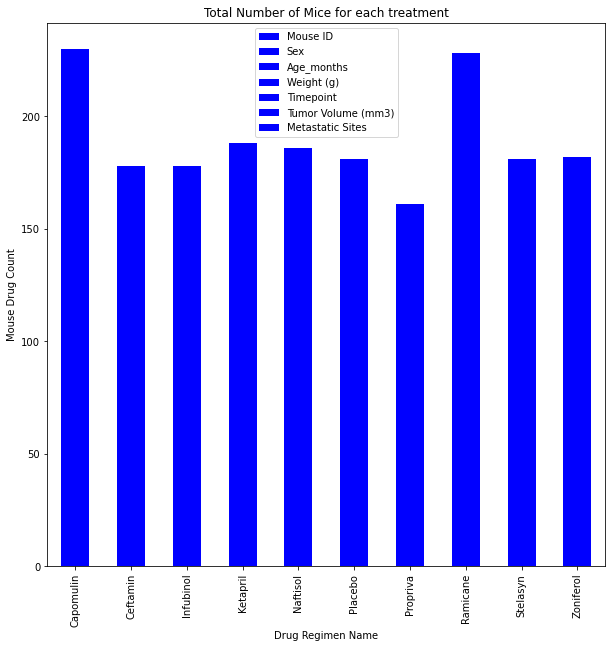

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

df_mouse_drug_regimen = pd.DataFrame(df_combined_mousedata.groupby(["Drug Regimen"]).count()).reset_index()
df_mouse_drug_index = df_mouse_drug_regimen[["Drug Regimen", "Mouse ID"]]

df_mouse_drug_index = df_mouse_drug_regimen.set_index("Drug Regimen")

fig,ax = plt.subplots(figsize=(10,10))

df_mouse_drug_index.plot(kind="bar", align="center", color="blue", ax=ax,);

ax.set(title="Total Number of Mice for each treatment",
       xlabel="Drug Regimen Name",
       ylabel="Mouse Drug Count");
ax.legend();

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

Drug_Regimen = df_regimen_summary_table.index.tolist()
print(Drug_Regimen)
Drug_Mouse_Count= (df_combined_mousedata.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
print(Drug_Mouse_Count)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]


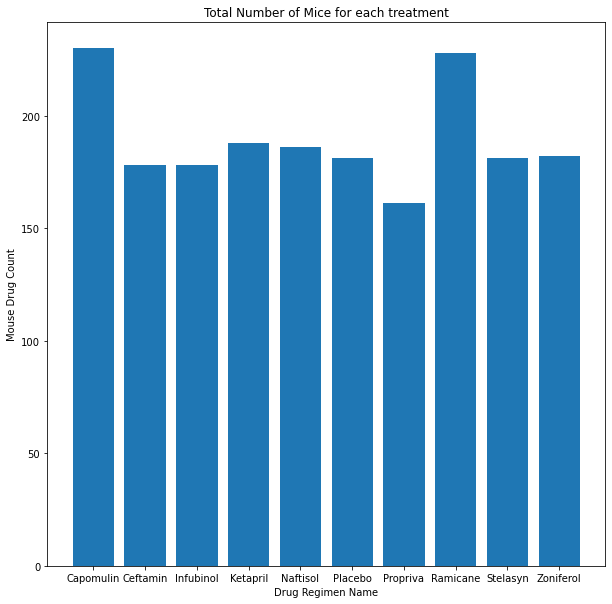

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(Drug_Mouse_Count))

fig, ax = plt.subplots(figsize = (10,10))
ax.bar(x_axis, Drug_Mouse_Count, align = "center")
ax.set(xticks= list(x_axis),
       xticklabels = Drug_Regimen, 
       xlabel="Drug Regimen Name",
      ylabel="Mouse Drug Count",
      title="Total Number of Mice for each treatment");

# Save the figure
fig.savefig("Total Number of Mice for each treatment-BarPlots.png")

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df_mouse_gender = pd.DataFrame(df_combined_mousedata.groupby(["Sex"]).count()).reset_index()
df_mouse_gender_index = df_mouse_gender.set_index("Sex")
df_mouse_gender_index = df_mouse_gender[["Sex", "Mouse ID"]]

df_mouse_gender_index

,Sex,Mouse ID
0,Female,935
1,Male,958


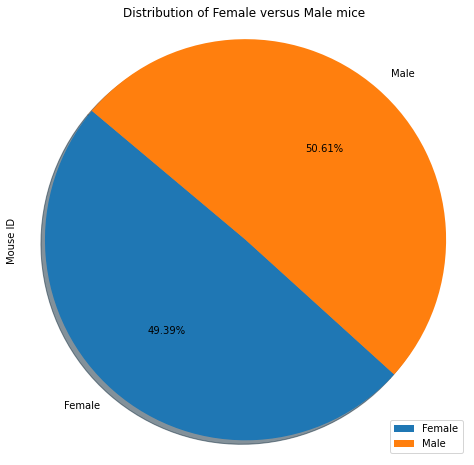

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

fig, ax = plt.subplots(figsize = (8,8))

df_mouse_gender_index.plot(kind="pie", y="Mouse ID", ax=ax, autopct="%2.2f%%",
                          shadow=True, startangle=140, labels=df_mouse_gender["Sex"]);

ax.set(title="Distribution of Female versus Male mice");

ax.axis("equal");
ax.legend();

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Mouse_Gender_Count= (df_combined_mousedata.groupby(["Sex"])["Mouse ID"].count()).tolist()
print(Mouse_Gender_Count)

[935, 958]


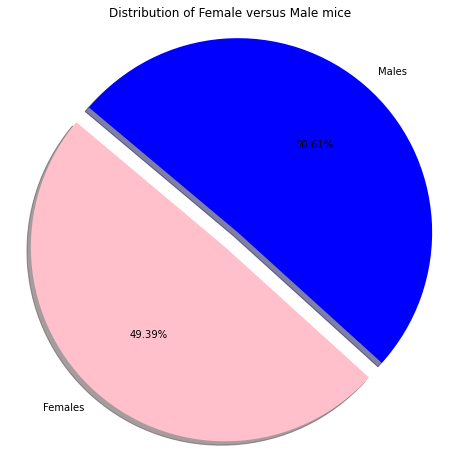

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_gender_category = ["Females", "Males"]
mouse_gender_count = Mouse_Gender_Count
mouse_gender_colors = ["Pink", "Blue"]
mouse_explode = (0.1,0)

fig, ax = plt.subplots(figsize = (8,8))
ax.pie(mouse_gender_count, labels=mouse_gender_category, 
       explode=mouse_explode, colors=mouse_gender_colors, 
       autopct="%2.2f%%", shadow=True, startangle=140);
ax.set(title="Distribution of Female versus Male mice")

ax.axis("equal");

# Save the figure
fig.savefig("Distribution of Female versus Male mice-PiePlots.png")

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

df_sorted_mousedata = df_combined_mousedata.sort_values(["Drug Regimen","Mouse ID","Timepoint"], ascending=True)
df_last_timepoint = df_sorted_mousedata.loc[df_sorted_mousedata["Timepoint"]==df_sorted_mousedata["Timepoint"].max()]

df_last_timepoint.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...,...
125,1344,p136,Zoniferol,Female,5,28,45,63.488697,2
126,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
127,1434,q633,Zoniferol,Male,12,25,45,70.827796,2
128,1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [21]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint (Capomulin). 

df_capomulin = df_last_timepoint[df_last_timepoint["Drug Regimen"]=="Capomulin"]
df_capomulin = df_capomulin.sort_values(["Tumor Volume (mm3)"], ascending=True)
df_capomulin.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,19,s185,Capomulin,Female,3,17,45,23.343598,1
1,39,m601,Capomulin,Male,22,17,45,28.430964,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,104,u364,Capomulin,Male,18,17,45,31.023923,3
4,124,y793,Capomulin,Male,17,17,45,31.896238,2
5,134,r554,Capomulin,Female,8,17,45,32.377357,3
6,144,m957,Capomulin,Female,3,19,45,33.329098,1
7,164,t565,Capomulin,Female,20,17,45,34.455298,0
8,224,w914,Capomulin,Male,24,21,45,36.041047,2
9,244,g288,Capomulin,Male,3,19,45,37.074024,1


In [22]:
# Put Capomulin treatments into a list for for loop (and later for plot labels)

df_capomulin_volume_list = df_capomulin["Tumor Volume (mm3)"]
df_capomulin_volume_list

19     23.343598
39     28.430964
29     28.484033
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
224    36.041047
244    37.074024
204    37.311846
337    38.125164
282    38.846876
299    38.939633
309    38.982878
360    40.159220
350    40.658124
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [23]:
#(Capomulin) - final tumor volume of each mouse across four of the treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

quartiles = df_capomulin_volume_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume (mm3) of each mouse via the Capomulin treatment regimen is: {lowerq}")
print(f"The upper quartile of Final Tumor Volume (mm3) of each mouse via the Capomulin treatment regimen is: {upperq}")
print(f"The interquartile range of Final Tumor Volume (mm3) of each mouse via the Capomulin treatment regimen is: {iqr}")
print(f"The the median of Final Tumor Volume (mm3) of each mouse via the Capomulin treatment regimen is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} (mm3) could be outliers.")
print(f"Values above {upper_bound} (mm3) could be outliers.")

The lower quartile of Final Tumor Volume (mm3) of each mouse via the Capomulin treatment regimen is: 32.37735684
The upper quartile of Final Tumor Volume (mm3) of each mouse via the Capomulin treatment regimen is: 40.1592203
The interquartile range of Final Tumor Volume (mm3) of each mouse via the Capomulin treatment regimen is: 7.781863460000004
The the median of Final Tumor Volume (mm3) of each mouse via the Capomulin treatment regimen is: 37.31184577 
Values below 20.70456164999999 (mm3) could be outliers.
Values above 51.83201549 (mm3) could be outliers.


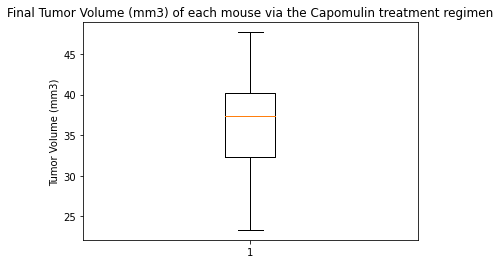

In [24]:
#(Capomulin) - Generate a box plot of the final tumor volume of each mouse across four regimens of interest.

green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3) of each mouse via the Capomulin treatment regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(df_capomulin_volume_list);
# Save the figure
fig1.savefig("Final Tumor Volume (mm3) of each mouse via the Capomulin treatment regime-BoxPlot.png")

In [25]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint (Ramicane). 

df_ramicane = df_last_timepoint[df_last_timepoint["Drug Regimen"]=="Ramicane"]
df_ramicane = df_ramicane.sort_values(["Tumor Volume (mm3)"], ascending=True)
df_ramicane.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,49,g791,Ramicane,Male,11,16,45,29.128472,1
2,59,s508,Ramicane,Male,1,17,45,30.276232,0
3,74,m546,Ramicane,Male,18,16,45,30.564625,1
4,84,z578,Ramicane,Male,11,16,45,30.638696,0
5,114,n364,Ramicane,Male,4,17,45,31.095335,1
6,94,j913,Ramicane,Female,4,17,45,31.560470,1
7,174,a644,Ramicane,Female,7,17,45,32.978522,1
8,154,c758,Ramicane,Male,9,17,45,33.397653,1
9,184,i177,Ramicane,Male,10,18,45,33.562402,3


In [26]:
# Put Ramicane treatments into a list for for loop (and later for plot labels)

df_ramicane_volume_list = df_ramicane["Tumor Volume (mm3)"]
df_ramicane_volume_list

9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
114    31.095335
94     31.560470
174    32.978522
154    33.397653
184    33.562402
194    36.134852
254    36.374510
234    37.225650
272    37.311236
327    38.407618
214    38.810366
400    40.659006
410    40.667713
430    43.047543
420    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [27]:
#(Ramicane) - final tumor volume of each mouse across four of the treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

quartiles = df_ramicane_volume_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume (mm3) of each mouse via the Ramicane treatment regimen is: {lowerq}")
print(f"The upper quartile of Final Tumor Volume (mm3) of each mouse via the Ramicane treatment regimen is: {upperq}")
print(f"The interquartile range of Final Tumor Volume (mm3) of each mouse via the Ramicane treatment regimen is: {iqr}")
print(f"The the median of Final Tumor Volume (mm3) of each mouse via the Ramicane treatment regimen is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} (mm3) could be outliers.")
print(f"Values above {upper_bound} (mm3) could be outliers.")

The lower quartile of Final Tumor Volume (mm3) of each mouse via the Ramicane treatment regimen is: 30.981175224999998
The upper quartile of Final Tumor Volume (mm3) of each mouse via the Ramicane treatment regimen is: 38.508305307499995
The interquartile range of Final Tumor Volume (mm3) of each mouse via the Ramicane treatment regimen is: 7.527130082499998
The the median of Final Tumor Volume (mm3) of each mouse via the Ramicane treatment regimen is: 34.848627300000004 
Values below 19.690480101250003 (mm3) could be outliers.
Values above 49.79900043124999 (mm3) could be outliers.


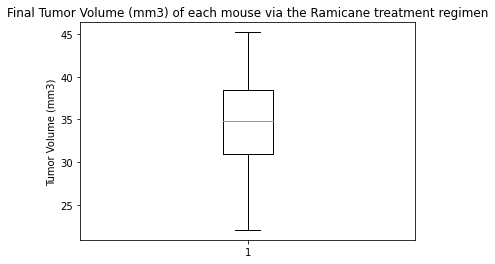

In [28]:
#(Ramicane) - Generate a box plot of the final tumor volume of each mouse across four regimens of interest.

green_diamond = dict(markerfacecolor='g', marker='D')
fig2, ax2 = plt.subplots()
ax2.set_title('Final Tumor Volume (mm3) of each mouse via the Ramicane treatment regimen')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(df_ramicane_volume_list);

# Save the figure
fig2.savefig("Final Tumor Volume (mm3) of each mouse via the Ramicane treatment regimen-BoxPlot.png")

In [29]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint (Infubinol). 

df_infubinol = df_last_timepoint[df_last_timepoint["Drug Regimen"]=="Infubinol"]
df_infubinol = df_infubinol.sort_values(["Tumor Volume (mm3)"], ascending=True)
df_infubinol.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,834,f345,Infubinol,Male,23,26,45,60.918767,1
1,800,e476,Infubinol,Male,23,26,45,62.435404,1
2,1872,z581,Infubinol,Female,24,25,45,62.754451,3
3,473,a251,Infubinol,Female,21,25,45,65.525743,1
4,540,a685,Infubinol,Male,8,30,45,66.083066,3
5,1053,k483,Infubinol,Female,20,30,45,66.196912,3
6,1813,y163,Infubinol,Female,17,27,45,67.685569,3
7,463,a203,Infubinol,Female,20,23,45,67.973419,2
8,637,c139,Infubinol,Male,11,28,45,72.226731,2


In [30]:
# Put Infubinol treatments into a list for for loop (and later for plot labels)

df_infubinol_volume_list = df_infubinol["Tumor Volume (mm3)"]
df_infubinol_volume_list

834     60.918767
800     62.435404
1872    62.754451
473     65.525743
540     66.083066
1053    66.196912
1813    67.685569
463     67.973419
637     72.226731
Name: Tumor Volume (mm3), dtype: float64

In [31]:
#(Infubinol) - final tumor volume of each mouse across four of the treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

quartiles = df_infubinol_volume_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume (mm3) of each mouse via the Infubinol treatment regimen is: {lowerq}")
print(f"The upper quartile of Final Tumor Volume (mm3) of each mouse via the Infubinol treatment regimen is: {upperq}")
print(f"The interquartile range of Final Tumor Volume (mm3) of each mouse via the Infubinol treatment regimen is: {iqr}")
print(f"The the median of Final Tumor Volume (mm3) of each mouse via the Infubinol treatment regimen is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} (mm3) could be outliers.")
print(f"Values above {upper_bound} (mm3) could be outliers.")

The lower quartile of Final Tumor Volume (mm3) of each mouse via the Infubinol treatment regimen is: 62.75445141
The upper quartile of Final Tumor Volume (mm3) of each mouse via the Infubinol treatment regimen is: 67.68556862
The interquartile range of Final Tumor Volume (mm3) of each mouse via the Infubinol treatment regimen is: 4.9311172099999965
The the median of Final Tumor Volume (mm3) of each mouse via the Infubinol treatment regimen is: 66.08306589 
Values below 55.35777559500001 (mm3) could be outliers.
Values above 75.08224443499999 (mm3) could be outliers.


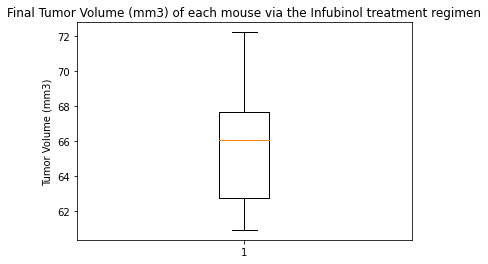

In [32]:
#(Infubinol) - Generate a box plot of the final tumor volume of each mouse across four regimens of interest.

green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Final Tumor Volume (mm3) of each mouse via the Infubinol treatment regimen')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(df_infubinol_volume_list);


# Save the figure
fig3.savefig("Final Tumor Volume (mm3) of each mouse via the Infubinol treatment regimen-BoxPlot.png")

In [33]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint (Ceftamin). 

df_ceftamin = df_last_timepoint[df_last_timepoint["Drug Regimen"]=="Ceftamin"]
df_ceftamin = df_ceftamin.sort_values(["Tumor Volume (mm3)"], ascending=True)
df_ceftamin.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,1260,o287,Ceftamin,Male,2,28,45,59.741901,4
1,1132,l661,Ceftamin,Male,18,26,45,59.851956,3
2,1797,x822,Ceftamin,Male,3,29,45,61.386660,3
3,1379,p438,Ceftamin,Female,11,26,45,61.433892,1
4,993,j296,Ceftamin,Female,24,30,45,61.849023,3
5,493,a275,Ceftamin,Female,20,28,45,62.999356,3
6,1162,l733,Ceftamin,Female,4,30,45,64.299830,1
7,1773,x581,Ceftamin,Female,19,28,45,64.634949,3
8,1855,y865,Ceftamin,Male,23,26,45,64.729837,3
9,1670,w151,Ceftamin,Male,24,25,45,67.527482,3


In [34]:
# Put Ceftamin treatments into a list for for loop (and later for plot labels)

df_ceftamin_volume_list = df_ceftamin["Tumor Volume (mm3)"]
df_ceftamin_volume_list

1260    59.741901
1132    59.851956
1797    61.386660
1379    61.433892
993     61.849023
493     62.999356
1162    64.299830
1773    64.634949
1855    64.729837
1670    67.527482
1112    67.748662
1845    68.594745
1033    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [35]:
#(Ceftamin) - final tumor volume of each mouse across four of the treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

quartiles = df_ceftamin_volume_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume (mm3) of each mouse via the Ceftamin treatment regimen is: {lowerq}")
print(f"The upper quartile of Final Tumor Volume (mm3) of each mouse via the Ceftamin treatment regimen is: {upperq}")
print(f"The interquartile range of Final Tumor Volume (mm3) of each mouse via the Ceftamin treatment regimen is: {iqr}")
print(f"The the median of Final Tumor Volume (mm3) of each mouse via the Ceftamin treatment regimen is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} (mm3) could be outliers.")
print(f"Values above {upper_bound} (mm3) could be outliers.")

The lower quartile of Final Tumor Volume (mm3) of each mouse via the Ceftamin treatment regimen is: 61.43389223
The upper quartile of Final Tumor Volume (mm3) of each mouse via the Ceftamin treatment regimen is: 67.52748237
The interquartile range of Final Tumor Volume (mm3) of each mouse via the Ceftamin treatment regimen is: 6.093590140000003
The the median of Final Tumor Volume (mm3) of each mouse via the Ceftamin treatment regimen is: 64.29983003 
Values below 52.29350701999999 (mm3) could be outliers.
Values above 76.66786758 (mm3) could be outliers.


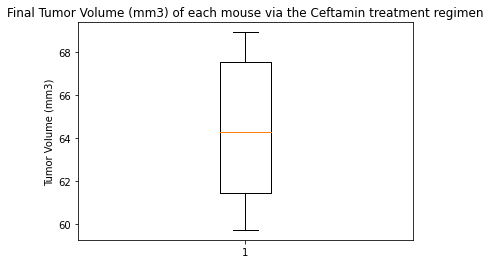

In [36]:
#(Ceftamin4) - Generate a box plot of the final tumor volume of each mouse across four regimens of interest.

green_diamond = dict(markerfacecolor='g', marker='D')
fig4, ax4 = plt.subplots()
ax4.set_title('Final Tumor Volume (mm3) of each mouse via the Ceftamin treatment regimen')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.boxplot(df_ceftamin_volume_list);

# Save the figure
fig4.savefig("Final Tumor Volume (mm3) of each mouse via the Ceftamin treatment regimen-BoxPlot")

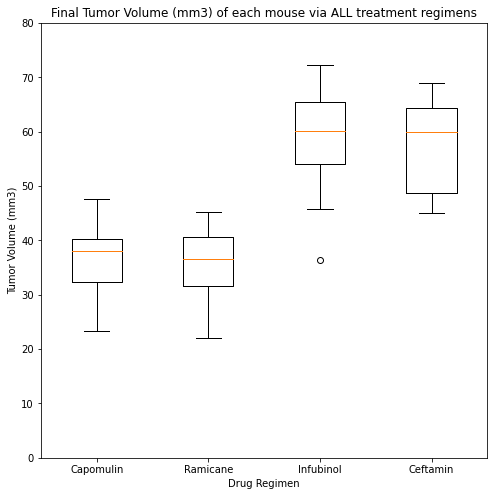

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

df_four_regimens = df_combined_mousedata[df_combined_mousedata["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
df_four_regimens = df_four_regimens.sort_values(["Timepoint"], ascending=True)
df_four_regimens_index = df_four_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

df_four_regimens_plot = df_four_regimens_index.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

df_four_regimens_plot2 = df_four_regimens_plot.to_frame()

df_plot_four = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

df_boxplot = df_four_regimens_plot2.reset_index()
df_tumor_volume_list = df_boxplot.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
df_tumor_volume_list2 = pd.DataFrame(df_tumor_volume_list)
df_tumor_volume_list2 = df_tumor_volume_list2.reindex(df_plot_four)
df_turn_up_the_volume = [vol for vol in df_tumor_volume_list2['Tumor Volume (mm3)']]

green_diamond = dict(markerfacecolor='g', marker='D')
fig5, ax5 = plt.subplots(figsize=(8,8))
ax5.boxplot(df_turn_up_the_volume, labels=df_plot_four)
ax5.set(ylim=(0, 80),
       title='Final Tumor Volume (mm3) of each mouse via ALL treatment regimens',
       xlabel='Drug Regimen',
       ylabel='Tumor Volume (mm3)');

fig5.savefig("Final Tumor Volume (mm3) of each mouse via ALL treatment regimens-BoxPlot.png")

## Line and Scatter Plots

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

df_sorted_mousedata = df_combined_mousedata.sort_values(["Drug Regimen","Mouse ID","Timepoint"], ascending=True)
df_lineplot_timepoint = df_sorted_mousedata.loc[df_sorted_mousedata["Drug Regimen"]=="Capomulin"]

print(df_lineplot_timepoint.reset_index())

df_capomulin_mouse = df_lineplot_timepoint.loc[df_lineplot_timepoint["Mouse ID"]=="i557"]
df_capomulin_mouse

     index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      300     b128    Capomulin  Female           9          22          0   
1      301     b128    Capomulin  Female           9          22          5   
2      302     b128    Capomulin  Female           9          22         10   
3      303     b128    Capomulin  Female           9          22         15   
4      304     b128    Capomulin  Female           9          22         20   
..     ...      ...          ...     ...         ...         ...        ...   
225    120     y793    Capomulin    Male          17          17         25   
226    121     y793    Capomulin    Male          17          17         30   
227    122     y793    Capomulin    Male          17          17         35   
228    123     y793    Capomulin    Male          17          17         40   
229    124     y793    Capomulin    Male          17          17         45   

     Tumor Volume (mm3)  Metastatic Sites  
0      

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_capomulin_mouse = df_capomulin_mouse.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
df_capomulin_mouse

,Timepoint,Tumor Volume (mm3)
431,0,45.000000
432,5,42.261665
433,10,42.992077
434,15,43.529876
435,20,43.967895
436,25,44.596219
437,30,45.261384
438,35,45.941949
439,40,46.821070
440,45,47.685963


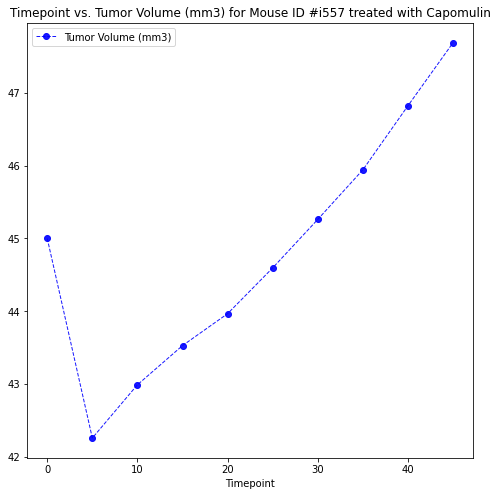

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

timepoint_fig = df_capomulin_mouse.set_index("Timepoint").plot.line(figsize=(8,8), marker='o', label='Capomulin',
                                                               title="Timepoint vs. Tumor Volume (mm3) for Mouse ID #i557 treated with Capomulin",
                                                               linestyle = '--', linewidth=1, color="b", alpha=0.9);

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

df_capomulin_averages = df_sorted_mousedata.loc[df_sorted_mousedata["Drug Regimen"]=="Capomulin"].mean().reset_index
print(df_capomulin_averages);

df_capomulin_combined_data = df_combined_mousedata.loc[df_combined_mousedata["Drug Regimen"]=="Capomulin"]
df_capomulin_weight_volume = df_capomulin_combined_data.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

<bound method Series.reset_index of Age_months            13.456522
Weight (g)            19.965217
Timepoint             21.565217
Tumor Volume (mm3)    40.675741
Metastatic Sites       0.713043
dtype: float64>


In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

df_capomulin_weight_mean = df_capomulin_weight_volume.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean()
#print(df_capomulin_weight_mean)

df_capomulin_weight_mean = pd.DataFrame({"Capomulin Tumor Volume (mm3) Average": df_capomulin_weight_mean}).reset_index()
df_capomulin_weight_mean

,Mouse ID,Weight (g),Capomulin Tumor Volume (mm3) Average
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


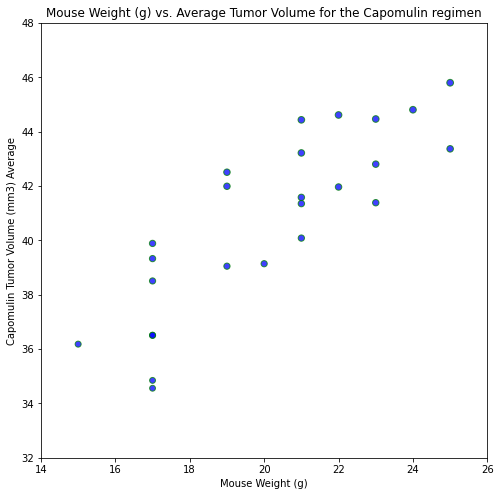

In [43]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

fig7, ax7 = plt.subplots(figsize=(8,8))

ax7.scatter(df_capomulin_weight_mean["Weight (g)"],
           df_capomulin_weight_mean["Capomulin Tumor Volume (mm3) Average"],
           marker='o',
           facecolors='blue',
           edgecolors='green',
           s=df_capomulin_weight_mean["Capomulin Tumor Volume (mm3) Average"],
           alpha=0.75);

ax7.set(xlim=(14,26),
       ylim=(32,48),
       title="Mouse Weight (g) vs. Average Tumor Volume for the Capomulin regimen",
       xlabel="Mouse Weight (g)",
       ylabel="Capomulin Tumor Volume (mm3) Average");

fig7.savefig("Mouse Weight (g) vs. Average Tumor Volume for the Capomulin regimen-ScatterPlot.png")

## Correlation and Regression

In [44]:
# Calculate the correlation coefficient and linear regression model 
mouse_correlation = st.pearsonr(df_capomulin_weight_mean["Weight (g)"],df_capomulin_weight_mean["Capomulin Tumor Volume (mm3) Average"])
print(f"The correlation between both factors is {round(mouse_correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8419363424694718
The equation of the regression line is: y = 0.95x + 21.55


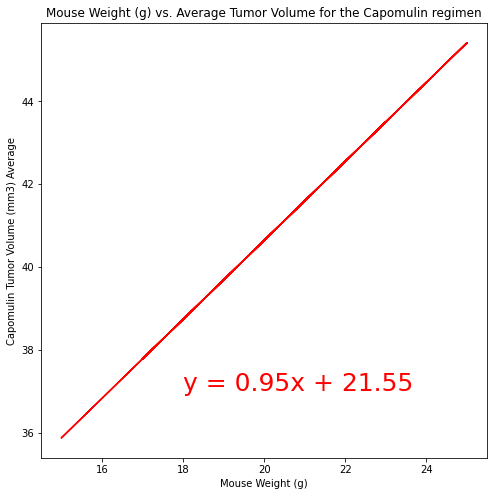

In [46]:
# for mouse weight and average tumor volume for the Capomulin regimen
# Print out the r-squared value along with the plot.

x_values_weight = df_capomulin_weight_mean["Weight (g)"]
y_values_volume = df_capomulin_weight_mean["Capomulin Tumor Volume (mm3) Average"]

from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_weight, y_values_volume)
regress_values = x_values_weight * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

fig8, ax8 = plt.subplots(figsize=(8,8))
ax.scatter(x_values_weight,y_values_volume)

ax8.plot(x_values_weight,regress_values,"r-")
ax8.annotate(line_eq,(18,37),fontsize=25,color="red")

ax8.set(title="Mouse Weight (g) vs. Average Tumor Volume for the Capomulin regimen",
       xlabel="Mouse Weight (g)",
       ylabel="Capomulin Tumor Volume (mm3) Average")
       
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

# Save the figure
fig8.savefig("Mouse Weight (g) vs. Average Tumor Volume for the Capomulin regimen-Correlation&RegressionScatter.png")